In [7]:
! pip install yfinance

In [8]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [9]:
import yfinance as yf
ticker = "MSFT"
data = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.to_csv("mstf_stock_data.csv")

In [11]:
import pandas as pd
df = pd.read_csv("mstf_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-25,27.670000,27.770000,27.549999,27.629999,17.237856,61529500
1,2004-10-26,27.709999,27.900000,27.629999,27.900000,17.406300,76966600
2,2004-10-27,27.860001,28.350000,27.580000,28.150000,17.562273,72392600
3,2004-10-28,28.110001,28.540001,27.900000,28.010000,17.474930,63059600
4,2004-10-29,28.120001,28.150000,27.799999,27.969999,17.449972,80010100


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5034 non-null   object 
 1   Open       5034 non-null   float64
 2   High       5034 non-null   float64
 3   Low        5034 non-null   float64
 4   Close      5034 non-null   float64
 5   Adj Close  5034 non-null   float64
 6   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.4+ KB


In [13]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [14]:
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-25,27.670000,27.770000,27.549999,27.629999,17.237856,61529500
2004-10-26,27.709999,27.900000,27.629999,27.900000,17.406300,76966600
2004-10-27,27.860001,28.350000,27.580000,28.150000,17.562273,72392600
2004-10-28,28.110001,28.540001,27.900000,28.010000,17.474930,63059600
2004-10-29,28.120001,28.150000,27.799999,27.969999,17.449972,80010100


In [15]:
data.to_csv("mstf_stock_data.csv")

In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,104.555898,105.552263,103.514090,104.577364,98.465969,4.482681e+07
std,113.783498,114.809906,112.645998,113.783120,114.770046,2.849767e+07
min,15.200000,15.620000,14.870000,15.150000,11.243176,7.425600e+06
25%,27.772501,28.000000,27.542500,27.799999,20.666295,2.509095e+07
50%,43.230000,43.695000,42.934999,43.365000,37.455284,3.730495e+07
75%,140.352501,141.614994,139.154999,140.387497,133.914131,5.687512e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,5.910522e+08


In [17]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df.shape

(5034, 6)

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,104.555898,105.552263,103.514090,104.577364,98.465969,4.482681e+07
std,113.783498,114.809906,112.645998,113.783120,114.770046,2.849767e+07
min,15.200000,15.620000,14.870000,15.150000,11.243176,7.425600e+06
25%,27.772501,28.000000,27.542500,27.799999,20.666295,2.509095e+07
50%,43.230000,43.695000,42.934999,43.365000,37.455284,3.730495e+07
75%,140.352501,141.614994,139.154999,140.387497,133.914131,5.687512e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,5.910522e+08


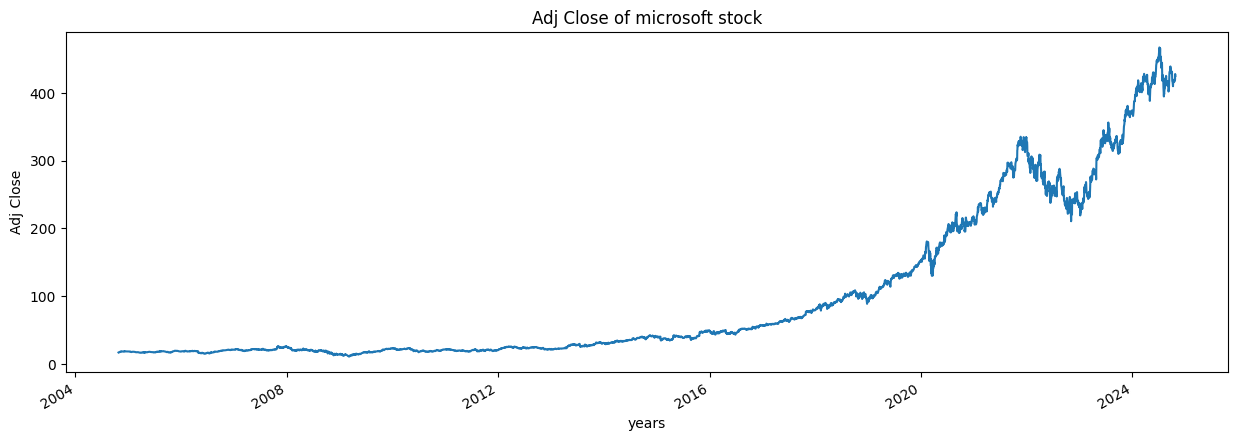

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of microsoft stock")
    plt.show()

plot_graph((15,5), df['Adj Close'], 'Adj Close')

In [21]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [22]:
for i in range(2004,2025):
    print(i,list(df.index.year).count(i))

2004 48
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 205


In [23]:
#calculating moving average(MA) with rolling window of 250 days
df['MA_for_250_days'] = df['Adj Close'].rolling(250).mean()

In [24]:
df['MA_for_250_days'][245:].head()

Date
2005-10-13          NaN
2005-10-14          NaN
2005-10-17          NaN
2005-10-18          NaN
2005-10-19    18.022574
Name: MA_for_250_days, dtype: float64

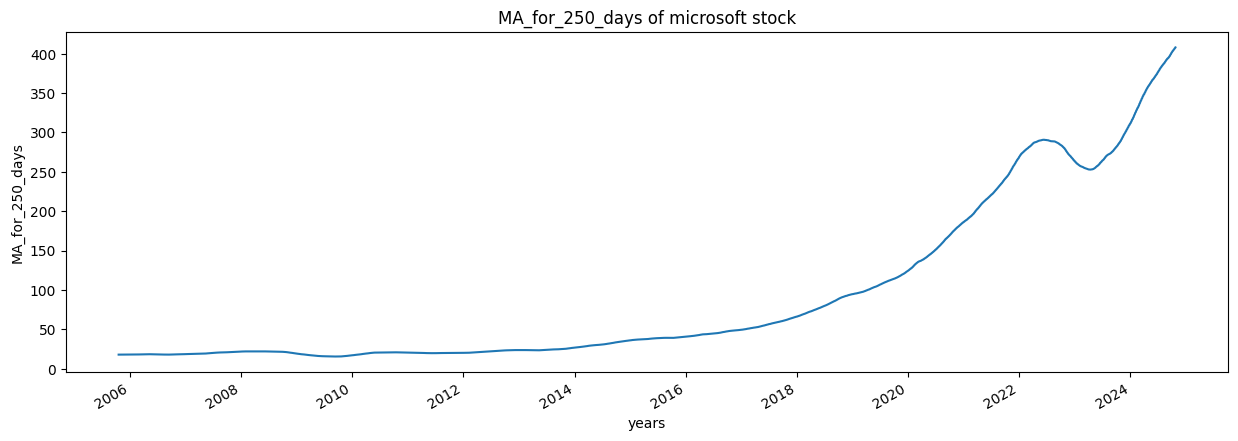

In [25]:
plot_graph((15,5), df['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

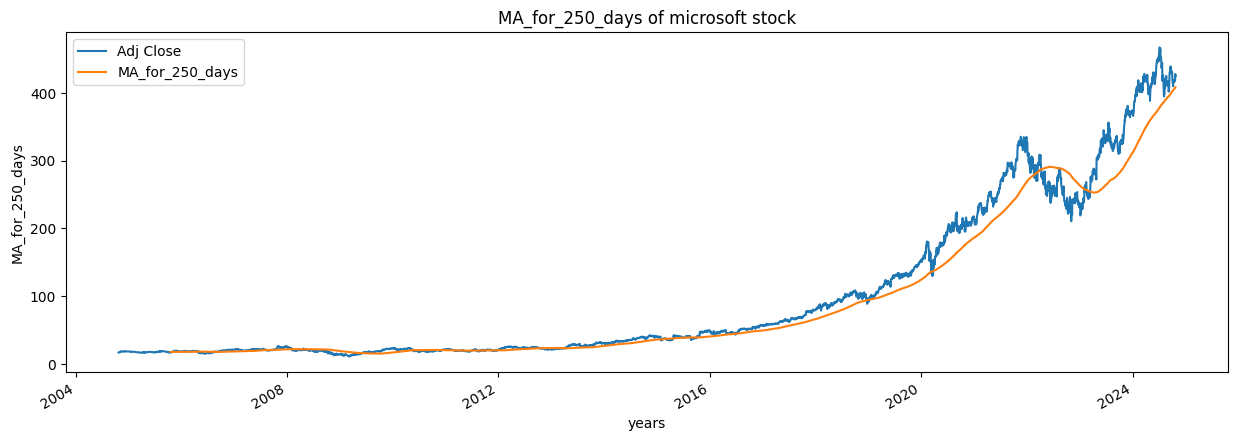

In [26]:
plot_graph((15,5), df[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

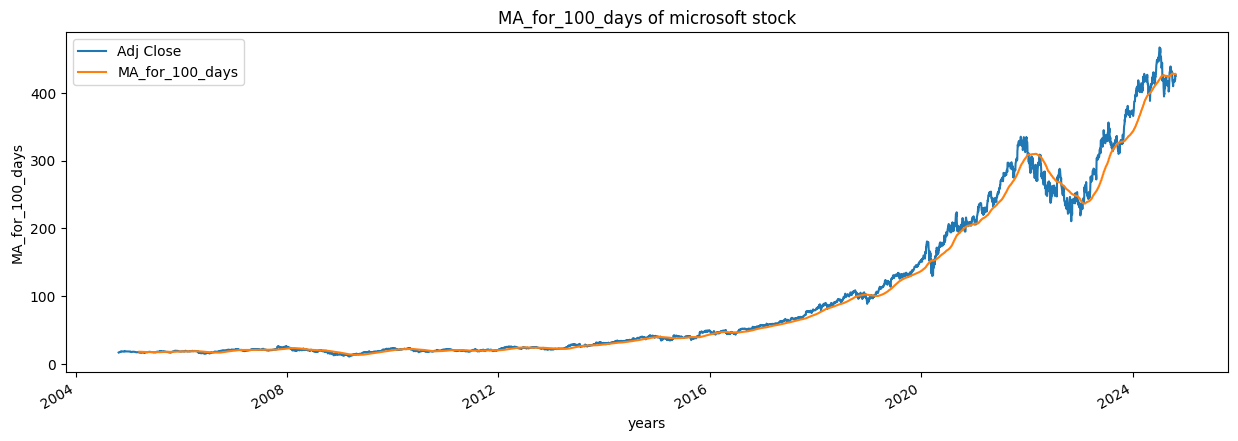

In [27]:
df['MA_for_100_days'] = df['Adj Close'].rolling(100).mean()
plot_graph((15,5), df[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

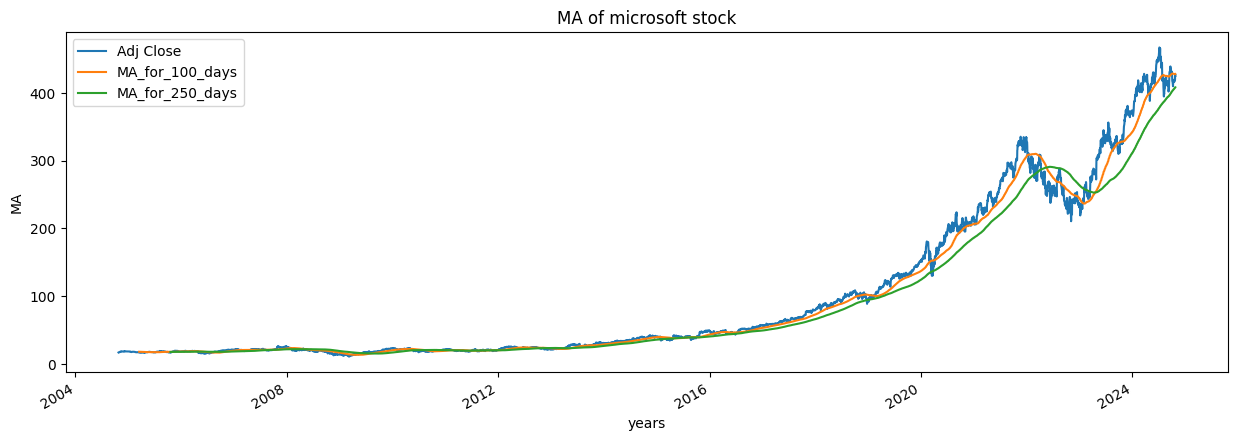

In [28]:
plot_graph((15,5), df[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [29]:
df['percentage_change_cp'] = df['Adj Close'].pct_change()
df[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-25,17.237856,NaN
2004-10-26,17.406300,0.009772
2004-10-27,17.562273,0.008961
2004-10-28,17.474930,-0.004973
2004-10-29,17.449972,-0.001428


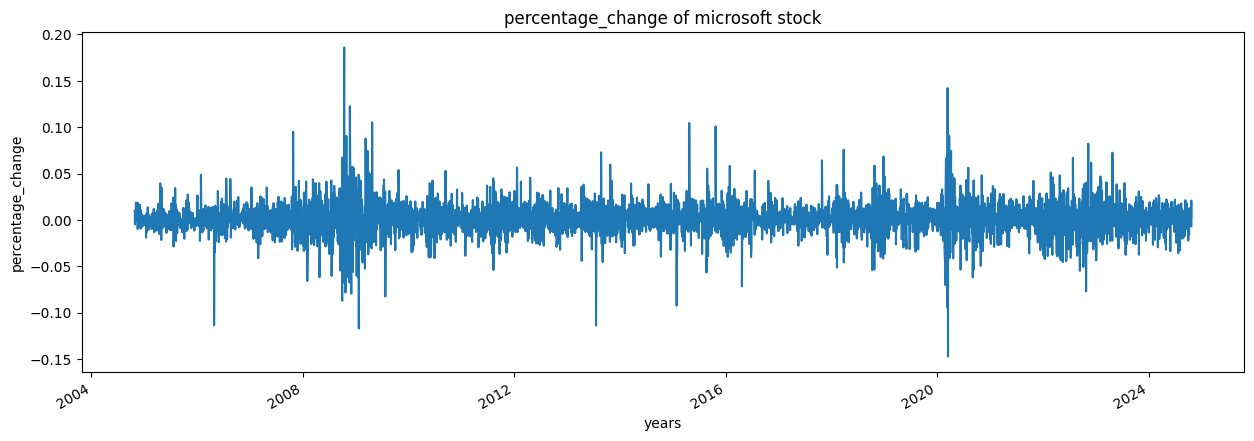

In [30]:
plot_graph((15,5), df['percentage_change_cp'], 'percentage_change')

In [31]:
Adj_close_price = df[['Adj Close']]
Adj_close_price.head()

,Adj Close
Date,
2004-10-25,17.237856
2004-10-26,17.406300
2004-10-27,17.562273
2004-10-28,17.474930
2004-10-29,17.449972


In [32]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([466.71878052]), array([11.24317551]))

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01316136],
       [0.01353118],
       [0.01387362],
       ...,
       [0.89475006],
       [0.91391686],
       [0.90752792]])

In [34]:
import numpy as np

SEQ_LEN = 100
# Function to create dataset with look back
def create_dataset(dataset, look_back=SEQ_LEN):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X, y = create_dataset(scaled_data)

In [35]:
X[0], y[0]

(array([0.01316136, 0.01353118, 0.01387362, 0.01368186, 0.01362707,
        0.01377773, 0.01399691, 0.01431193, 0.0150379 , 0.0154625 ,
        0.01542142, 0.0160926 , 0.01603779, 0.01638025, 0.01636653,
        0.01712986, 0.01671767, 0.016794  , 0.01664134, 0.01632072,
        0.01600015, 0.01581696, 0.01598487, 0.01592382, 0.01618335,
        0.01624442, 0.01691611, 0.01667187, 0.01688559, 0.01703826,
        0.01664134, 0.01708406, 0.01688559, 0.01665659, 0.01691611,
        0.01688559, 0.01670241, 0.01677873, 0.01647341, 0.01645814,
        0.01664134, 0.01648869, 0.01654976, 0.01630546, 0.01645814,
        0.01638181, 0.01616807, 0.01610703, 0.01613755, 0.01629022,
        0.01619861, 0.01615284, 0.0160307 , 0.01622914, 0.01612226,
        0.01619861, 0.01542003, 0.01519103, 0.01549636, 0.0149773 ,
        0.01479411, 0.01447351, 0.01450405, 0.01503837, 0.01502311,
        0.01517577, 0.01528264, 0.0154353 , 0.01560323, 0.01571008,
        0.01528264, 0.01549636, 0.01525211, 0.01

In [36]:
int(len(X)*0.7)

3453

In [37]:
# Split data into train, validation, and test sets
q_70 = int(len(X) * .7)
q_80 = int(len(X) * .8)

X_train, y_train = X[:q_70], y[:q_70]
X_val, y_val = X[q_70:q_80], y[q_70:q_80]
X_test, y_test = X[q_80:], y[q_80:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3453, 100, 1)
y_train shape: (3453,)
X_val shape: (493, 100, 1)
y_val shape: (493,)
X_test shape: (987, 100, 1)
y_test shape: (987,)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [41]:
model.fit(X_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 161s 45ms/step - loss: 1.3447e-04 - mean_absolute_error: 0.0065
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 183s 53ms/step - loss: 4.2894e-05 - mean_absolute_error: 0.0045


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
test_predictions = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step


In [44]:
inv_predictions = scaler.inverse_transform(test_predictions)

In [45]:
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [46]:
ploting_data = pd.DataFrame(
        {
            'original_test_data': inv_y_test.reshape(-1),
            'predictions': inv_predictions.reshape(-1)
        },
        index=df.index[q_70 + 100:q_70 + 100 + len(inv_predictions)]
    )

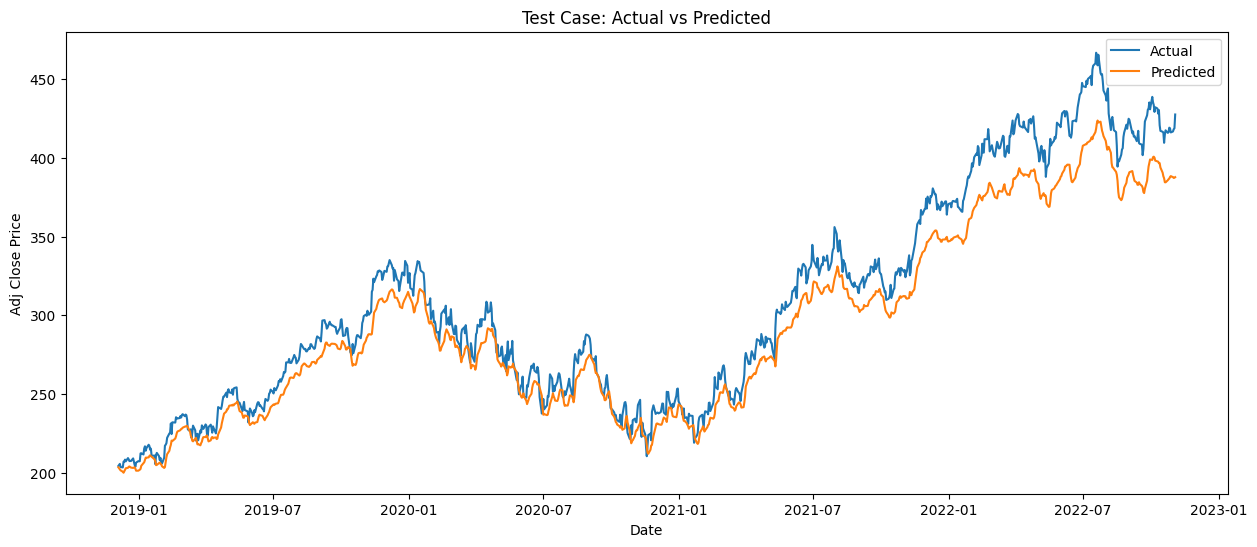

In [47]:
# Plot for test case
plt.figure(figsize=(15, 6))
plt.plot(ploting_data['original_test_data'], label='Actual')
plt.plot(ploting_data['predictions'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Test Case: Actual vs Predicted')
plt.legend()
plt.show()

In [48]:
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)

test_predictions = inv_predictions

train_data = pd.DataFrame({'predictions': train_predictions.reshape(-1)},
                         index=df.index[SEQ_LEN:q_70 + SEQ_LEN])
val_data = pd.DataFrame({'predictions': val_predictions.reshape(-1)},
                       index=df.index[q_70 + SEQ_LEN:q_80 + SEQ_LEN])
test_data = pd.DataFrame({'predictions': test_predictions.reshape(-1)},
                        index=df.index[q_80 + SEQ_LEN:q_80 + SEQ_LEN + len(test_predictions)])

all_predictions = pd.concat([train_data, val_data, test_data])

108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


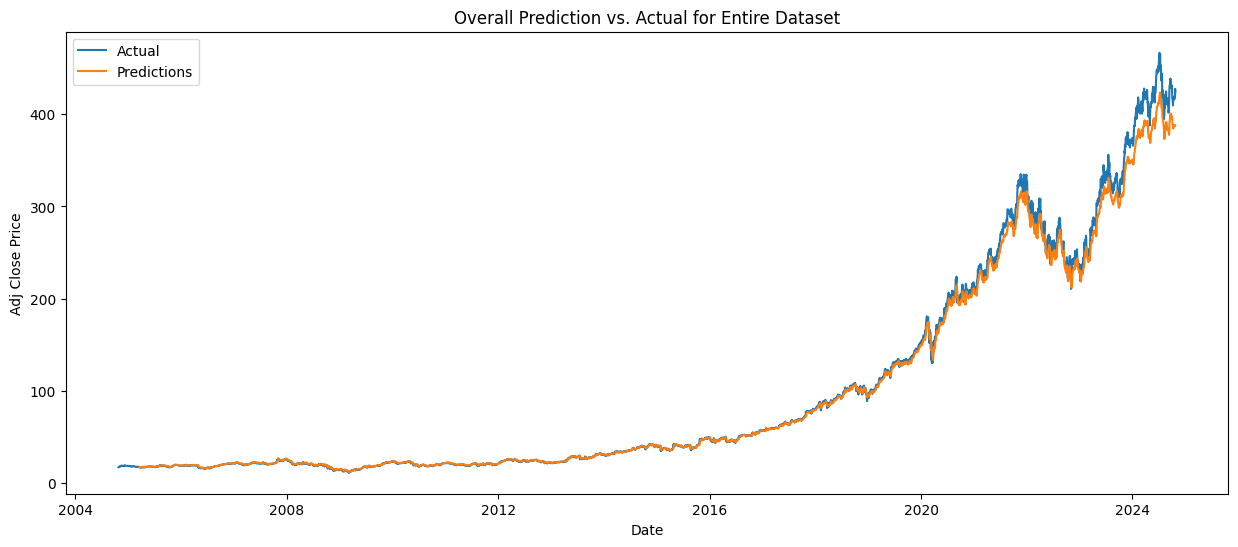

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(Adj_close_price['Adj Close'], label='Actual')
plt.plot(all_predictions['predictions'], label='Predictions')  # Use all_predictions directly
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Overall Prediction vs. Actual for Entire Dataset')
plt.legend()
plt.show()

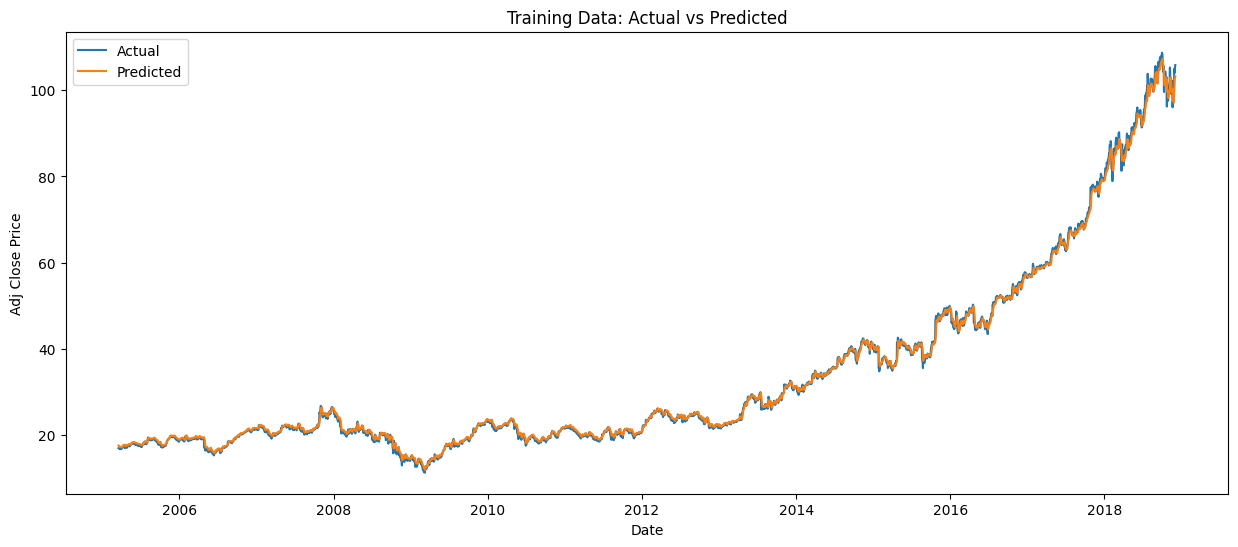

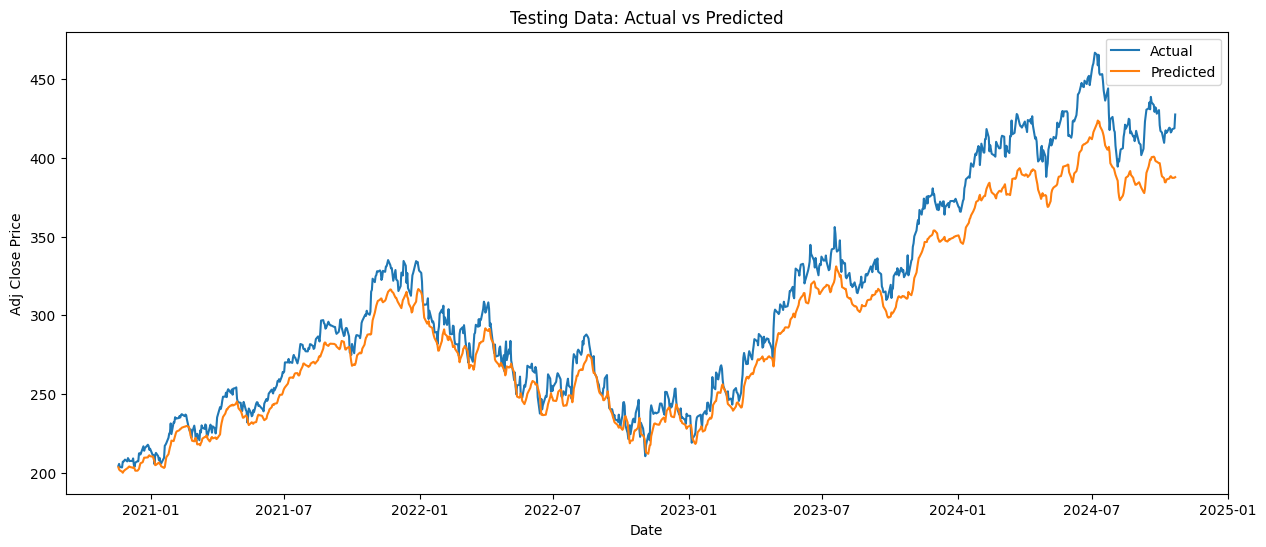

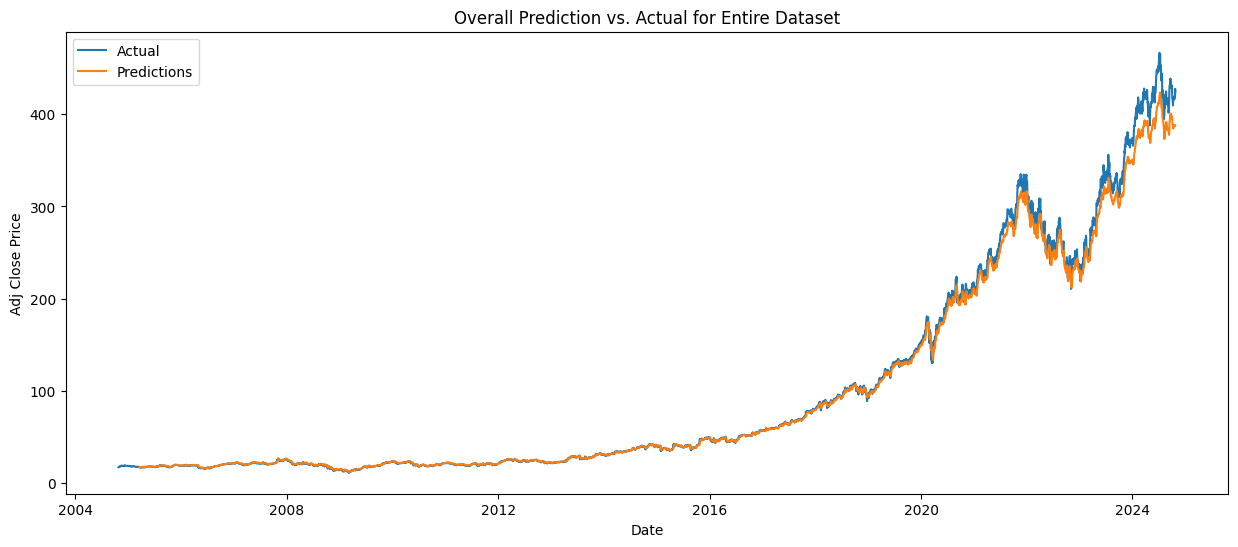

In [50]:
import matplotlib.pyplot as plt

# 1. Training Data Plot: Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.plot(df['Adj Close'][SEQ_LEN:q_70 + SEQ_LEN], label='Actual')
plt.plot(train_data['predictions'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

# 2. Testing Data Plot: Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.plot(df['Adj Close'][q_80 + SEQ_LEN:q_80 + SEQ_LEN + len(test_predictions)], label='Actual')
plt.plot(test_data['predictions'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.show()

#3. Overall Prediction vs. Actual for Entire Dataset
plt.figure(figsize=(15, 6))
plt.plot(Adj_close_price['Adj Close'], label='Actual')
plt.plot(all_predictions['predictions'], label='Predictions')  # Use all_predictions directly
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Overall Prediction vs. Actual for Entire Dataset')
plt.legend()
plt.show()

In [52]:
model.save('Latest_stock_price_model.keras')